# Analisis base de casos

Con este analisis vemos la forma que tiene nuestra base de casos. Realizamos clustering de nuestros casos y vemos cuales se parecen más.
Además, realizamos estudio de usuarios presentes en nuestra base de casos. Analisis Univariante, y Bivariante con la ruta asignada para cada uno.

In [1]:
import pandas as pd

base_dades = pd.read_json("C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/data/base_de_dades_final.json")

In [2]:
base_dades.columns

Index(['visitante_id', 'visitant_edat', 'visitant_visites', 'visitant_dies',
       'visitant_hores', 'visitant_companyia', 'visitant_estudis',
       'visitant_coneixement', 'visitant_quizz', 'visitant_interessos_autor',
       'visitant_interessos_estils', 'visitant_interessos_tipus', 'ruta',
       'ruta_quadres', 'ruta_temps', 'puntuacio_ruta'],
      dtype='object')

In [3]:
base_dades.describe()

,visitante_id,visitant_edat,visitant_visites,visitant_dies,visitant_hores,visitant_coneixement,visitant_quizz,ruta_temps,puntuacio_ruta
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,245.568228,40.675153,1.102851,5.613035,4.604888,5.502037,3.301426,1550.366599,2.518330
std,145.066539,15.526354,1.486127,2.913806,2.252351,2.792427,1.942281,1196.913106,1.379613
min,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,68.000000,0.000000
25%,120.250000,30.000000,0.000000,3.000000,3.000000,3.000000,2.000000,540.000000,2.000000
50%,253.000000,37.000000,0.000000,6.000000,5.000000,5.000000,4.000000,1201.000000,3.000000
75%,374.000000,49.000000,2.000000,8.000000,7.000000,8.000000,5.000000,2400.000000,3.000000
max,499.000000,99.000000,8.000000,10.000000,8.000000,10.000000,6.000000,4803.000000,5.000000


In [4]:
base_dades.dtypes

visitante_id                   int64
visitant_edat                  int64
visitant_visites               int64
visitant_dies                  int64
visitant_hores                 int64
visitant_companyia            object
visitant_estudis                bool
visitant_coneixement           int64
visitant_quizz                 int64
visitant_interessos_autor     object
visitant_interessos_estils    object
visitant_interessos_tipus     object
ruta                          object
ruta_quadres                  object
ruta_temps                     int64
puntuacio_ruta                 int64
dtype: object

In [5]:
num_cols = base_dades.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = base_dades.select_dtypes(include=['object', 'bool']).columns.to_list()

print('Numerical columns:\n', {col for col in num_cols})
print('\nCategorical columns:\n', {col for col in cat_cols})

Numerical columns:
 {'visitante_id', 'visitant_dies', 'visitant_edat', 'visitant_hores', 'visitant_quizz', 'ruta_temps', 'puntuacio_ruta', 'visitant_coneixement', 'visitant_visites'}

Categorical columns:
 {'visitant_interessos_autor', 'visitant_interessos_estils', 'ruta_quadres', 'ruta', 'visitant_estudis', 'visitant_companyia', 'visitant_interessos_tipus'}


In [6]:
artworks_data = pd.read_csv("C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/artworks_data/artworks_final.csv")
artworks_data.columns

Index(['Title', 'Artist', 'ConstituentID', 'Date', 'Medium', 'Classification',
       'URL', 'ImageURL', 'Dim_cm2', 'Style'],
      dtype='object')

In [7]:
# one hot encoding for categorical variables

categorical_variables_to_consider = ['visitant_interessos_estils', 'visitant_interessos_tipus',
                         'visitant_companyia', 'visitant_estudis']

interessos_estils = artworks_data['Style'].unique().tolist()

companyia = [
    "alone", "group"
]

interessos_types = artworks_data['Classification'].unique().tolist()

# Creem una columna binària per cada estil
for estil in interessos_estils:
    base_dades[f'estil_{estil}'] = base_dades['visitant_interessos_estils'].apply(lambda x: 1 if estil in x else 0)

# Creem una columna binària per cada companyia
for comp in companyia:
    base_dades[f'companyia_{comp}'] = base_dades['visitant_companyia'].apply(lambda x: 1 if comp in x else 0)

# Creem una columna binària per cada tipus d'interès
for tipus in interessos_types:
    base_dades[f'interes_{tipus}'] = base_dades['visitant_interessos_tipus'].apply(lambda x: 1 if tipus in x else 0)

# convertim la columna visitant_estudis a binaria
base_dades['visitant_estudis'] = base_dades['visitant_estudis'].apply(lambda x: 1 if x else 0)

base_dades = base_dades.drop(columns=['visitant_interessos_estils', 'visitant_interessos_autor', 
                                      'visitant_companyia', 'visitant_interessos_tipus'])

In [8]:
base_dades.columns

Index(['visitante_id', 'visitant_edat', 'visitant_visites', 'visitant_dies',
       'visitant_hores', 'visitant_estudis', 'visitant_coneixement',
       'visitant_quizz', 'ruta', 'ruta_quadres', 'ruta_temps',
       'puntuacio_ruta', 'estil_Surrealismo', 'estil_Cubismo', 'estil_Pop Art',
       'estil_Expresionismo Abstracto', 'estil_Postmodernismo',
       'estil_Impresionismo', 'estil_Realismo', 'estil_Arte Contemporáneo',
       'estil_Romanticismo', 'companyia_alone', 'companyia_group',
       'interes_Print', 'interes_Drawing', 'interes_Painting',
       'interes_Poster', 'interes_Collage'],
      dtype='object')

In [24]:
base_dades.dtypes

visitante_id                      int64
visitant_edat                     int64
visitant_visites                  int64
visitant_dies                     int64
visitant_hores                    int64
visitant_estudis                  int64
visitant_coneixement              int64
visitant_quizz                    int64
ruta                             object
ruta_quadres                     object
ruta_temps                        int64
puntuacio_ruta                    int64
estil_Surrealismo                 int64
estil_Cubismo                     int64
estil_Pop Art                     int64
estil_Expresionismo Abstracto     int64
estil_Postmodernismo              int64
estil_Impresionismo               int64
estil_Realismo                    int64
estil_Arte Contemporáneo          int64
estil_Romanticismo                int64
companyia_alone                   int64
companyia_group                   int64
interes_Print                     int64
interes_Drawing                   int64


In [9]:
# Normalitzem les dades numèriques
cols_to_compare = base_dades.select_dtypes(include=['int64']).columns.to_list()

# extreure las columnas puntuacio_ruta i visitant_id
cols_to_compare.remove('puntuacio_ruta')
cols_to_compare.remove('visitante_id')
cols_to_compare.remove('ruta_temps')

base_dades_normalized = base_dades[cols_to_compare].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print(base_dades_normalized.columns)
print(base_dades_normalized)

Index(['visitant_edat', 'visitant_visites', 'visitant_dies', 'visitant_hores',
       'visitant_estudis', 'visitant_coneixement', 'visitant_quizz',
       'estil_Surrealismo', 'estil_Cubismo', 'estil_Pop Art',
       'estil_Expresionismo Abstracto', 'estil_Postmodernismo',
       'estil_Impresionismo', 'estil_Realismo', 'estil_Arte Contemporáneo',
       'estil_Romanticismo', 'companyia_alone', 'companyia_group',
       'interes_Print', 'interes_Drawing', 'interes_Painting',
       'interes_Poster', 'interes_Collage'],
      dtype='object')
     visitant_edat  visitant_visites  visitant_dies  visitant_hores  \
0         0.247312             0.000       0.333333        0.857143   
1         0.236559             0.000       0.444444        0.714286   
2         0.236559             0.125       0.777778        0.857143   
3         0.236559             0.250       0.888889        1.000000   
4         0.236559             0.375       0.777778        1.000000   
..             ...         

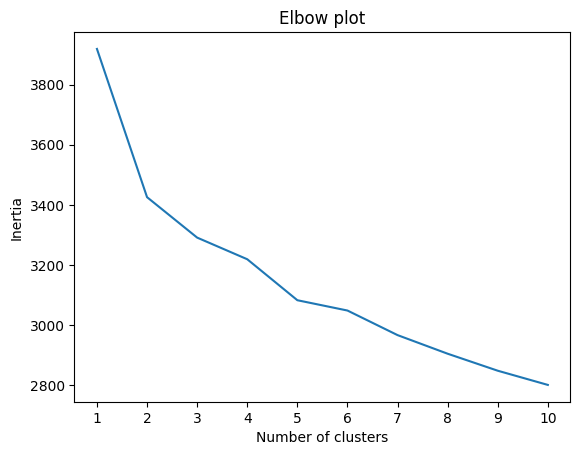

In [10]:
# fem clustering amb KMeans, abans de decidir el número de clusters, hem de fer un elbow plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(base_dades_normalized)
    inertia.append(kmeans.inertia_)

# mostrem en l'eix de les x el num de clusters de 1 a 10 de 1 en 1
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()



In [11]:
# ens quedem amb 5 clusters, fem el clustering i ens quedem amb la representació de cada cluster
kmeans = KMeans(n_clusters=5, random_state=42)
base_dades['cluster'] = kmeans.fit_predict(base_dades_normalized)
base_dades_normalized['cluster'] = base_dades['cluster']

# Calculem la representació (mitjanes) de cada cluster
representacio_clusters = base_dades.groupby('cluster')

# guardem la representació de cada cluster en un diccionari
clusters_representation = {}
for cluster, data in base_dades.groupby('cluster'):
    clusters_representation[cluster] = {}
    for col in cols_to_compare:
        clusters_representation[cluster][col] = data[col].mean()

# guardem la representació de cada cluster en un dataframe
clusters_representation_df = pd.DataFrame(clusters_representation)


In [12]:
display(clusters_representation_df)

,0,1,2,3,4
visitant_edat,39.325175,44.572139,40.905213,40.267045,37.212963
visitant_visites,1.122378,1.074627,1.023697,1.017045,1.398148
visitant_dies,5.723776,5.661692,5.701422,5.494318,5.250000
visitant_hores,4.597902,4.477612,4.753555,4.772727,4.296296
visitant_estudis,0.534965,0.223881,0.535545,0.715909,0.675926
visitant_coneixement,5.548951,5.781095,5.431280,5.465909,5.055556
visitant_quizz,3.360140,3.293532,3.360190,3.460227,2.787037
estil_Surrealismo,0.230769,0.189055,0.199052,0.284091,0.175926
estil_Cubismo,0.209790,0.268657,0.241706,0.232955,0.222222
estil_Pop Art,0.276224,0.174129,0.251185,0.227273,0.296296


In [13]:
# guardar base de dades normalitzada
base_dades_normalized.to_csv('C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/data/base_de_dades_normalized.csv', index=False)

In [14]:
base_dades.to_json('C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/data/base_de_dades_final.json', orient='records')

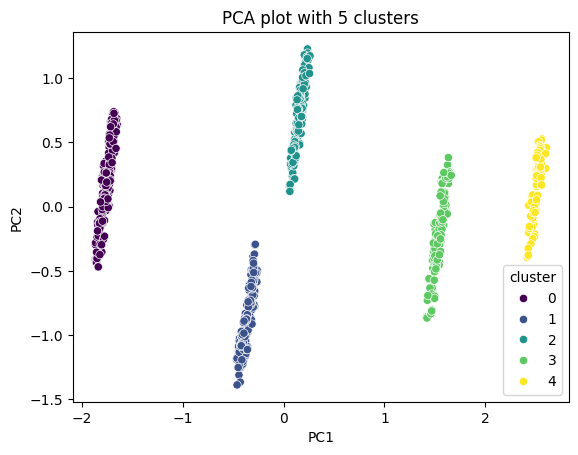

In [15]:
# visualitzem els clusters amb PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(base_dades_normalized)

base_dades_pca = pca.transform(base_dades_normalized)
base_dades_pca = pd.DataFrame(base_dades_pca, columns=['PC1', 'PC2'])
base_dades_pca['cluster'] = kmeans.labels_

sns.scatterplot(data=base_dades_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('PCA plot with 5 clusters')
plt.show()


## Generació Edat Visitants

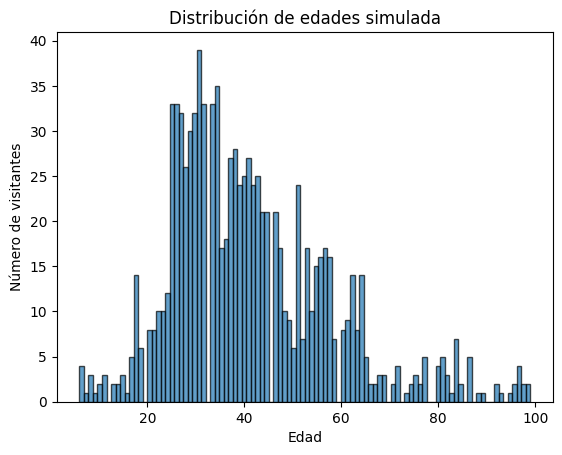

In [142]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import random

import numpy as np

# Rangs d'edat i pesos de la distribució segons les dades
age_ranges = [(6, 17), (18, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 99)]
data = [
    3.0,  # Menors (6-17 anys), ajustat per afegir-los al total
    8.317,  # 18-24
    41.148,  # 25-34
    29.914,  # 35-44
    17.254,  # 45-54
    14.571,  # 55-64
    10.301   # 65+
]

# Normalització dels pesos
weights_normalized = np.array(data) / np.sum(data)

# Funció per generar una edat aleatòria segons el rang seleccionat
def generate_age():
    selected_range = np.random.choice(len(age_ranges), p=weights_normalized)
    age = np.random.randint(age_ranges[selected_range][0], age_ranges[selected_range][1] + 1)
    return age

# Generar 1000 edats com a exemple
ages = [generate_age() for _ in range(1000)]


# Visualiza la distribución
plt.hist(ages, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Número de visitantes')
plt.title('Distribución de edades simulada')
plt.show()
